<a href="https://colab.research.google.com/github/Dansouza-web/-Projeto-NBA-Data-SCIENCE-2025/blob/main/AED_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df_mvp = pd.read_csv('df_mvp.csv')
df_mvp.head()

,PLAYER_NAME,TEAM_ABBREVIATION,SEASON,GP,MIN,PTS,REB,AST,STL,BLK,TOV,FG_PCT,FG3_PCT,FT_PCT,PLUS_MINUS,IS_MVP,EFF
0,aj price,MIN,2013-14,28,99.368333,44,10,13,1,0,7,0.413,0.273,0.000,2,0,61
1,aaron brooks,DEN,2013-14,72,1557.271667,645,140,233,52,13,117,0.401,0.387,0.874,-95,0,966
2,aaron gray,SAC,2013-14,37,354.375000,65,111,22,10,8,31,0.443,0.000,0.550,-84,0,185
3,adonis thomas,PHI,2013-14,6,37.583333,14,3,3,0,0,1,0.429,0.200,1.000,8,0,19
4,al harrington,WAS,2013-14,34,511.365000,225,80,28,14,0,34,0.396,0.340,0.771,46,0,313


In [5]:
df_mvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5790 entries, 0 to 5789
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLAYER_NAME        5790 non-null   object 
 1   TEAM_ABBREVIATION  5790 non-null   object 
 2   SEASON             5790 non-null   object 
 3   GP                 5790 non-null   int64  
 4   MIN                5790 non-null   float64
 5   PTS                5790 non-null   int64  
 6   REB                5790 non-null   int64  
 7   AST                5790 non-null   int64  
 8   STL                5790 non-null   int64  
 9   BLK                5790 non-null   int64  
 10  TOV                5790 non-null   int64  
 11  FG_PCT             5790 non-null   float64
 12  FG3_PCT            5790 non-null   float64
 13  FT_PCT             5790 non-null   float64
 14  PLUS_MINUS         5790 non-null   int64  
 15  IS_MVP             5790 non-null   int64  
 16  EFF                5790 

In [6]:
df_mvp.describe().round()

,GP,MIN,PTS,REB,AST,STL,BLK,TOV,FG_PCT,FG3_PCT,FT_PCT,PLUS_MINUS,IS_MVP,EFF
count,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0,5790.0
mean,48.0,1103.0,493.0,200.0,109.0,35.0,22.0,62.0,0.0,0.0,1.0,-0.0,0.0,797.0
std,25.0,826.0,466.0,187.0,126.0,31.0,28.0,59.0,0.0,0.0,0.0,165.0,0.0,703.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-684.0,0.0,-3.0
25%,27.0,320.0,104.0,50.0,19.0,9.0,4.0,15.0,0.0,0.0,1.0,-73.0,0.0,190.0
50%,55.0,1021.0,372.0,157.0,67.0,28.0,13.0,46.0,0.0,0.0,1.0,-9.0,0.0,649.0
75%,70.0,1791.0,756.0,288.0,148.0,53.0,30.0,91.0,0.0,0.0,1.0,52.0,0.0,1234.0
max,84.0,3125.0,2818.0,1247.0,907.0,191.0,269.0,464.0,1.0,1.0,1.0,1072.0,1.0,3987.0


In [7]:
print(df_mvp[df_mvp['IS_MVP'] == 1]['SEASON'].value_counts().sort_index())

SEASON
2013-14    1
2014-15    1
2015-16    1
2016-17    1
2017-18    1
2018-19    1
2019-20    1
2020-21    1
2021-22    1
2022-23    1
2023-24    1
Name: count, dtype: int64


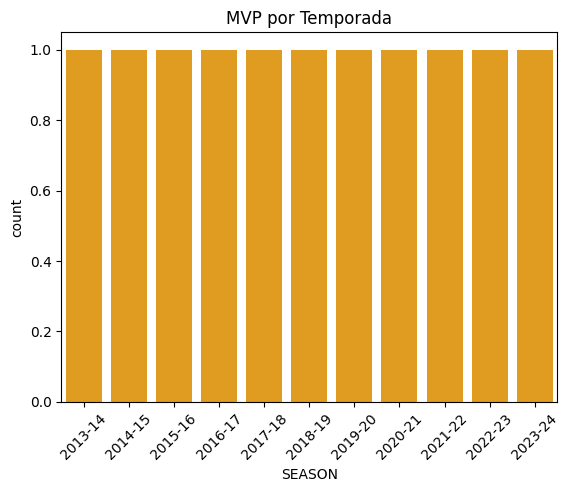

In [8]:
sns.countplot(data=df_mvp[df_mvp['IS_MVP'] == 1], x='SEASON',color='orange')
plt.title('MVP por Temporada')
plt.xticks(rotation=45)
plt.show()

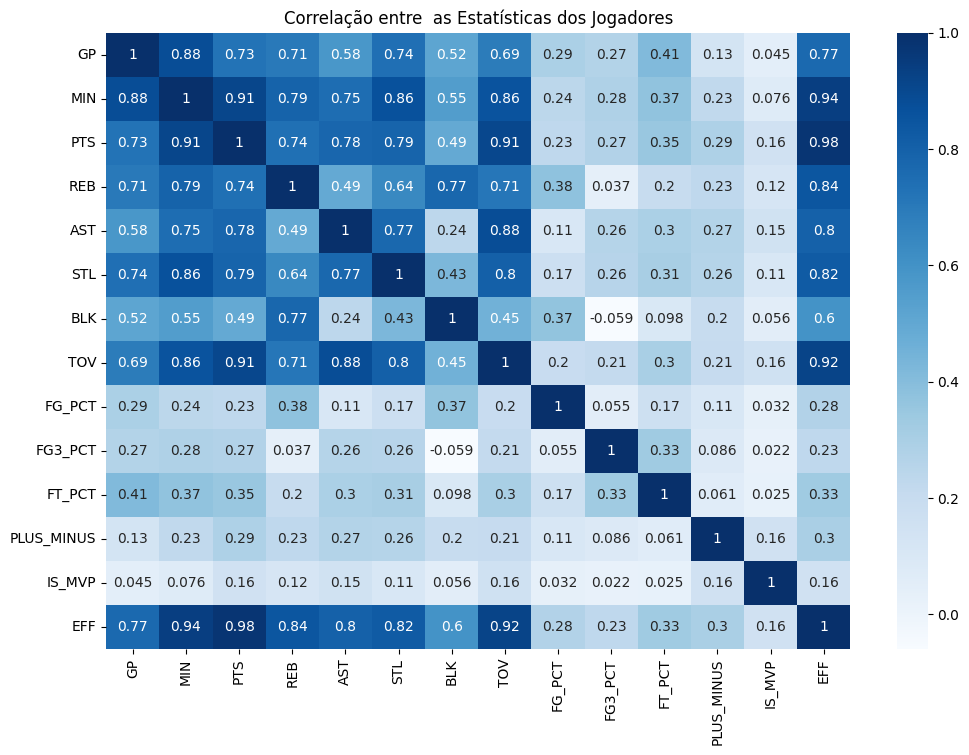

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_mvp.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlação entre  as Estatísticas dos Jogadores')
plt.show()

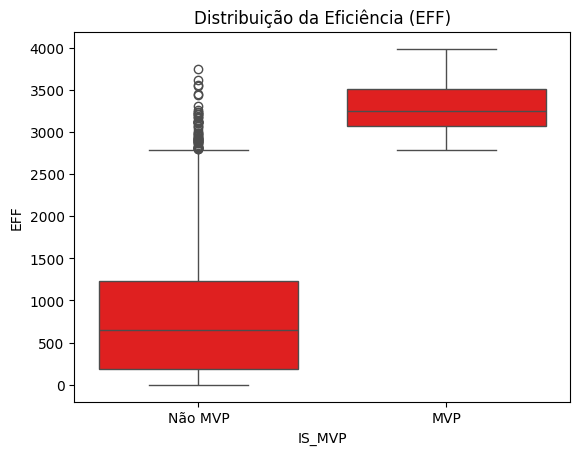

In [10]:
#COMPARAÇÃO DE MVP E NÃO MVP
sns.boxplot(data=df_mvp, x='IS_MVP', y='EFF',color='red')
plt.xticks([0, 1], ['Não MVP', 'MVP'])
plt.title('Distribuição da Eficiência (EFF)')
plt.show()


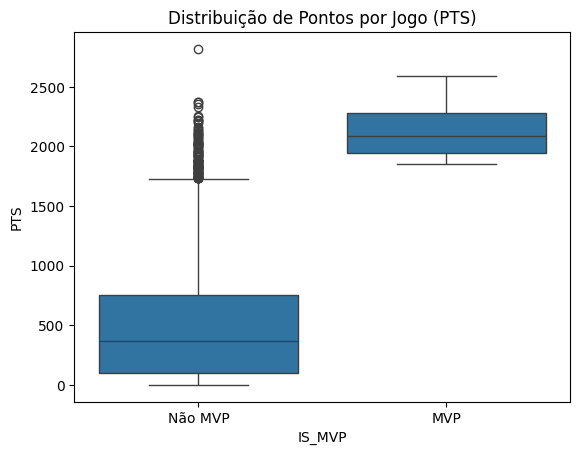

In [11]:
#pontos por jogo
sns.boxplot(data=df_mvp, x='IS_MVP', y='PTS')
plt.xticks([0, 1], ['Não MVP', 'MVP'])
plt.title('Distribuição de Pontos por Jogo (PTS)')
plt.show()


In [12]:
top_eff = df_mvp.sort_values(by=['SEASON', 'EFF'], ascending=[True, False]) \
                .groupby('SEASON').head(5)

top_eff[['SEASON', 'PLAYER_NAME', 'EFF', 'IS_MVP']].sort_values(by=['SEASON', 'EFF'])


,SEASON,PLAYER_NAME,EFF,IS_MVP
48,2013-14,blake griffin,2915,0
65,2013-14,carmelo anthony,2924,0
287,2013-14,lebron james,2987,0
267,2013-14,kevin love,3212,0
265,2013-14,kevin durant,3513,1
510,2014-15,anthony davis,2706,0
560,2014-15,chris paul,2759,0
916,2014-15,stephen curry,2790,1
892,2014-15,russell westbrook,2809,0
681,2014-15,james harden,3134,0


#- Jogadores MVP apresentam, em média, maior eficiência (EFF), mais pontos e mais assistências.
#-A estatística EFF parece ser uma boa candidata para prever MVPs.
#- Agora, vamos treinar um modelo para prever o MVP com base nos dados.

<ipython-input-13-293846a5e7c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mvp,x='IS_MVP', y='PLUS_MINUS',palette='Set2')


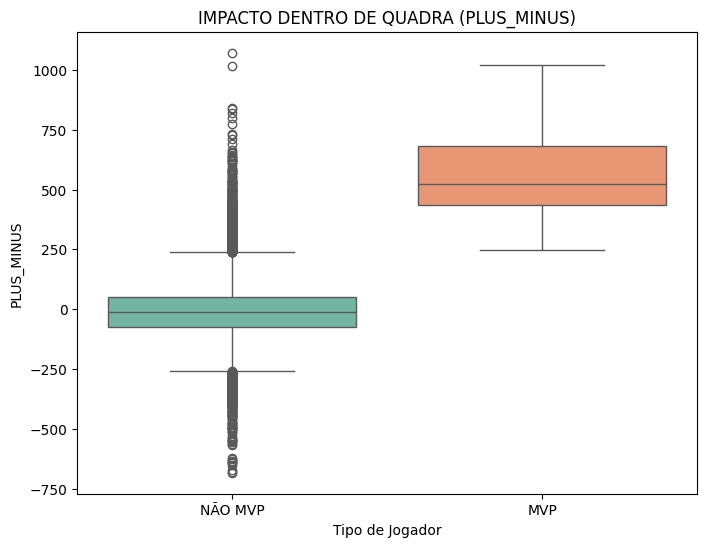

In [13]:
#DIFERENÇA DE IMPACTO NA QUADRA MVP X NÃO MVP
plt.figure(figsize=(8,6))
sns.boxplot(data=df_mvp,x='IS_MVP', y='PLUS_MINUS',palette='Set2')
plt.xticks([0,1], ['NÃO MVP', 'MVP'])
plt.title('IMPACTO DENTRO DE QUADRA (PLUS_MINUS)')
plt.xlabel('Tipo de Jogador')
plt.ylabel('PLUS_MINUS')
plt.show()